## 랜덤포레스트
#### <img src='../img/randomforest.png' width='85%'>
* 앙상블 학습 알고리즘 중 대표적인 학습 알고리즘
* 여러 개의 의사결정나무들을 생성한 다음,
* 각 개별 트리의 예측값들 중에서 가장 많이 선택된 클래스로 예측하는 알고리즘
* 물론, 배깅분류기에 의사결정트리를 넣는 대신 결정트리에 최적화되어 있는 포레스트분류기를 사용

In [1]:
from load_ds_module import *

### 테스트용 데이터 생성 및 분할

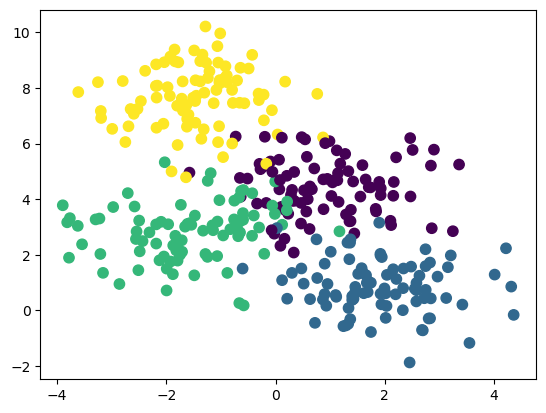

In [2]:
X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, train_size=0.25,
                       stratify=y, random_state=2309271340)

### 랜덤포레스트 분류

In [4]:
# criterion : 정보 혼잡도 알고리즘 지정
rfclf = RandomForestClassifier(n_estimators=30,
                              n_jobs=-1, oob_score=True, criterion='entropy',
                              random_state=2309271340)

In [5]:
rfclf.fit(X_train, y_train)
rfclf.score(X_train, y_train)

1.0

In [6]:
rfclf.oob_score_

0.9655172413793104

In [7]:
pred = rfclf.predict(X_test)
accuracy_score(y_test, pred)

0.8935361216730038

#### 결정 경계 시각화

<Axes: >

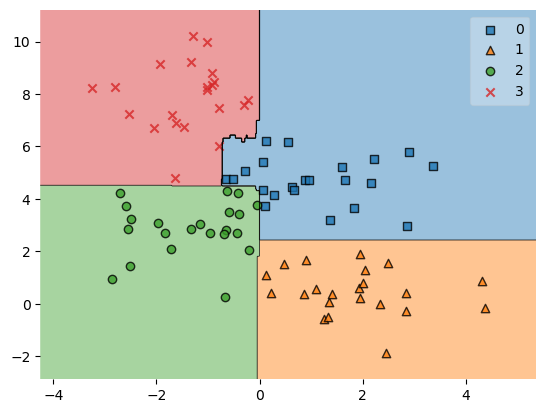

In [8]:
plot_decision_regions(X_train, y_train, rfclf)

<Axes: >

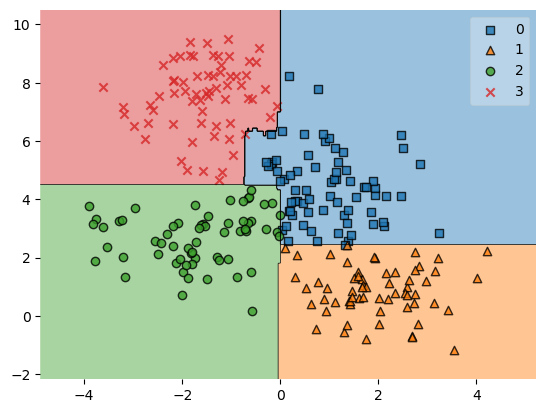

In [9]:
plot_decision_regions(X_test, pred, rfclf)

### 특성중요도
* 랜덤포레스트 분류기의 장점은 특성의 중요도를 측정할 수 있음
* 어떤 특성이 불순도를 낮추는지 확인하여 중요도를 측정
* feature_importances_를 이용해서 중요도 출력가능

In [10]:
rfclf.feature_importances_

array([0.4557322, 0.5442678])

### 과일, 채소 구분하기

In [11]:
fresh = pd.read_csv('data/fresh.csv', encoding='euc-kr')
fresh.columns = ['name','sweet','chunchy','kind']
fresh.kind = fresh.kind.map({'과일':0, '단백질':1, '채소':2})

In [12]:
data = fresh.iloc[:, [1,2]]
target = fresh.kind

In [13]:
rfclf = RandomForestClassifier(n_estimators=10, n_jobs=-1,
                              oob_score=True, criterion='entropy',
                              random_state=2309271405)
rfclf.fit(data, target)
rfclf.score(data, target)

0.9333333333333333

In [14]:
rfclf.oob_score_

0.7333333333333333

In [15]:
rfclf.feature_importances_

array([0.52973565, 0.47026435])

<Axes: >

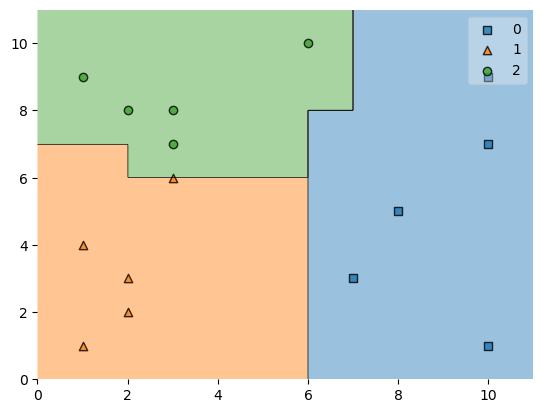

In [16]:
plot_decision_regions(data.to_numpy(), target.to_numpy(), rfclf)

In [17]:
newOne = np.array([[6,4]])
rfclf.predict_proba(newOne), rfclf.predict_proba(newOne)

(array([[0.6, 0.2, 0.2]]), array([[0.6, 0.2, 0.2]]))